## AutoEncoder

the goal here is to build an AutoEncoder (AE). We will explore three different settings. First a classical AE where we impose that output correspond to the input. In a second setting we will see how we can design a denoising machine using the AE. Finally we will try to see if we can use the AE to make a small counter.

### Classical Autoencoder. 

The Autoencoder is a simple neural network with one hidden layer and an output of the size of the input. In order to familiarize with it, you can use the two following cells:

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

f = gzip.open('../../M1Pro-ML/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, valid_set, test_set = p

In [2]:
# import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [23]:
# AE

# shape of the input
size_im = 784

# we define a first layer of inputs
input_img = Input(shape=(size_im,))
# HiddL1 = Dense(200,activation='relu')(input_img)
HiddL2 = Dense(50,activation='relu')(input_img)
# HiddL3 = Dense(200,activation='relu')(HiddL2)
# and a layer of output
output = Dense(784, activation='sigmoid')(HiddL2)

# On assemble le modèle
AE = Model(input_img, output)
AE.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               39984     
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


In [24]:
# we specify the way the gradient is cimputed and the loss
AE.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [25]:
AE.fit(train_set[0][:10000,:], train_set[0][:10000,:],
       epochs=50,
       batch_size=32,
       shuffle=True)

Epoch 1/50
10000/10000 [==============================] - 7s 652us/sample - loss: 0.2441 - acc: 0.7848
Epoch 2/50
10000/10000 [==============================] - 4s 373us/sample - loss: 0.1579 - acc: 0.7993
Epoch 3/50
10000/10000 [==============================] - 4s 371us/sample - loss: 0.1335 - acc: 0.8029
Epoch 4/50
10000/10000 [==============================] - 3s 343us/sample - loss: 0.1188 - acc: 0.8049
Epoch 5/50
10000/10000 [==============================] - 4s 356us/sample - loss: 0.1088 - acc: 0.8061
Epoch 6/50
10000/10000 [==============================] - 5s 487us/sample - loss: 0.1018 - acc: 0.8068
Epoch 7/50
10000/10000 [==============================] - 5s 465us/sample - loss: 0.0964 - acc: 0.8072
Epoch 8/50
10000/10000 [==============================] - 4s 384us/sample - loss: 0.0925 - acc: 0.8075
Epoch 9/50
10000/10000 [==============================] - 5s 505us/sample - loss: 0.0895 - acc: 0.8077
Epoch 10/50
10000/10000 [==============================] - 5s 493us/sampl

KeyboardInterrupt: 

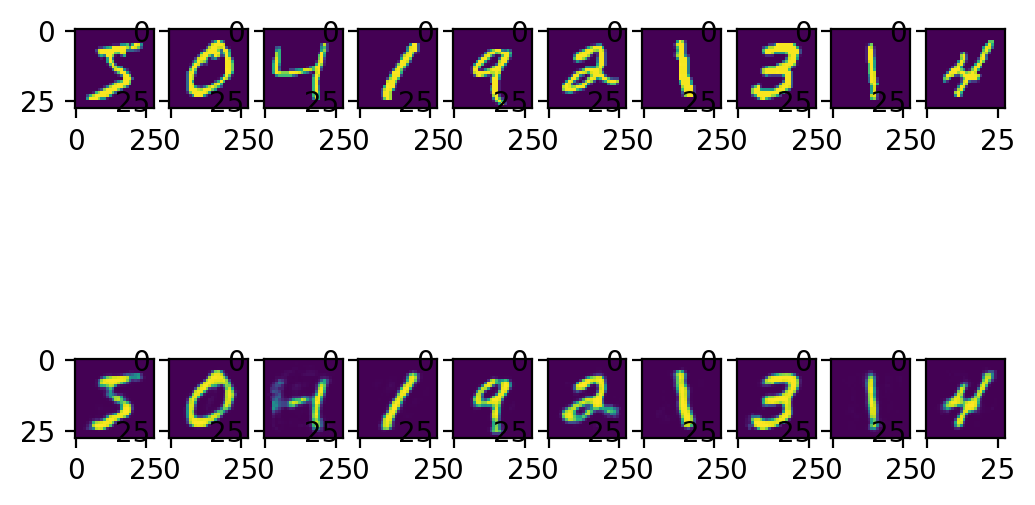

In [26]:
AE_p = AE.predict(train_set[0][:10,:])
f,ax = plt.subplots(2,10,dpi=200)
for i in range(10):
    ax[0,i].imshow(train_set[0][i,:].reshape(28,28))
    ax[1,i].imshow(AE_p[i,:].reshape(28,28))

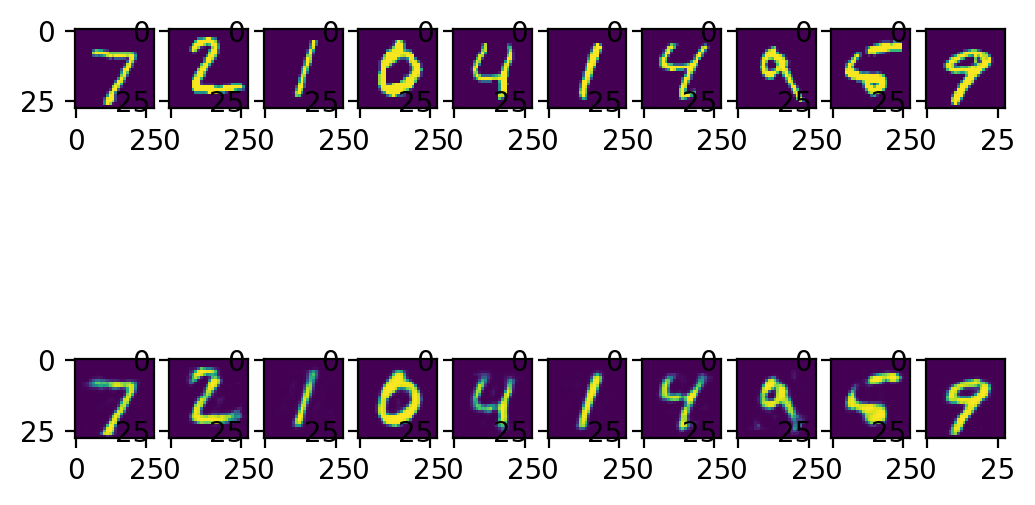

In [27]:
AE_p = AE.predict(test_set[0][:10,:])
f,ax = plt.subplots(2,10,dpi=200)
for i in range(10):
    ax[0,i].imshow(test_set[0][i,:].reshape(28,28))
    ax[1,i].imshow(AE_p[i,:].reshape(28,28))

Todo: 
  * do you understand why the activation function of the last layer is a sigmoid ?
  * why should we use the cross-entropy loss ?
  * try to add  other hidden layer. Do you see any improvement ?
  * verify that the network works on the test set

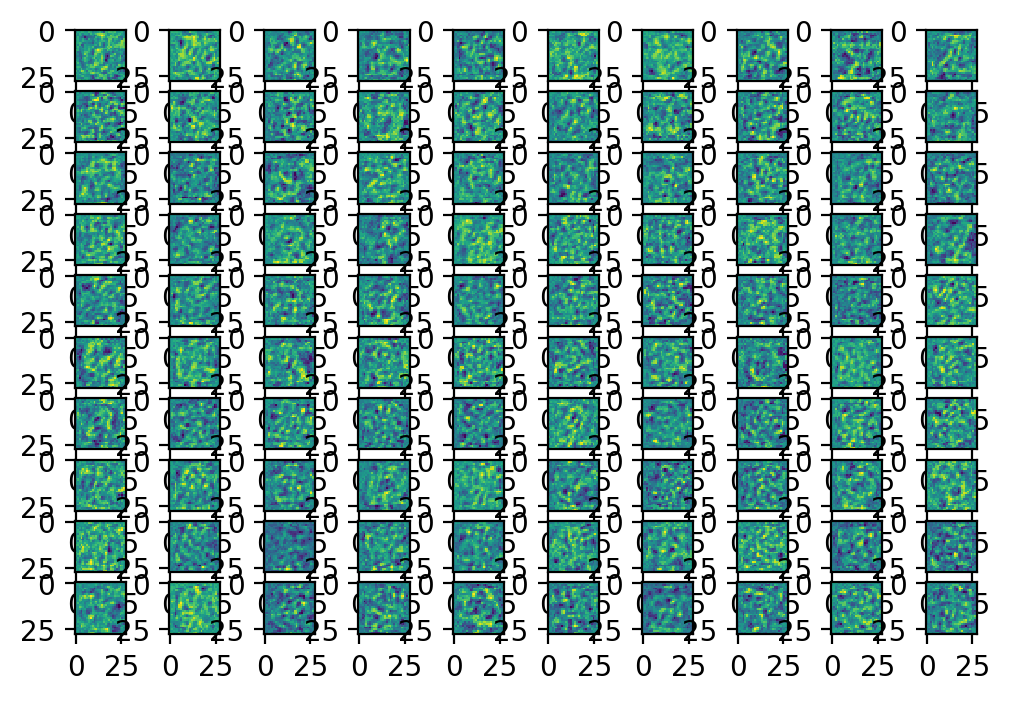

In [14]:
f,ax = plt.subplots(10,10,dpi=200)
idx = 0
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(AE.get_weights()[0][:,idx].reshape(28,28))
        idx += 1
idx += 1

In [17]:
AE.get_weights()[3].shape

(784,)

### Part II
We consider the following noisy-process:

In [11]:
# pour la seconde partie
noise_factor = 0.5
X_train_noisy = train_set[0] * np.random.binomial(1,1-noise_factor, size=train_set[0].shape) 
X_test_noisy = train_set[0] * np.random.binomial(1,1-noise_factor, size=train_set[0].shape)

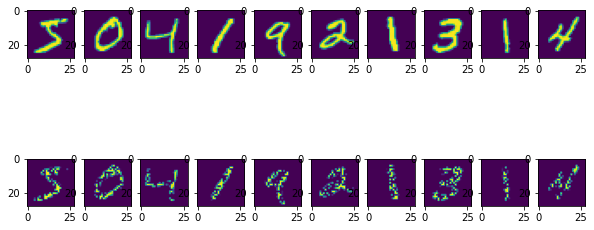

In [13]:
f,ax = plt.subplots(2,10,figsize=(10,5))
for i in range(10):
    ax[0,i].imshow(train_set[0][i,:].reshape(28,28))
    ax[1,i].imshow(X_train_noisy[i,:].reshape(28,28))

Design an Auto-encoder to denoise these images.
TODO: check that it work for different values of noise_factor

### Part III
Using the same dataset, design an autoencoder that will associate to a given digit, the digit incremented of one.